<a href="https://colab.research.google.com/github/SEKAR147/SK_Pytorch_Workpace/blob/main/Pytorch__Custom_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch Custom Datasets Video Notebook By SK

### 0. Importing a Pytorch and setting up device agnostic code

In [203]:
import torch
from torch import nn

torch.__version__

'2.6.0+cu124'

In [204]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available () else "CPU"
device

'cuda'

In [205]:
!nvidia-smi

Wed May  7 18:12:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             32W /   70W |    1572MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1. Get Data

our dataset is a subset of the Food101 dataset

Our dataset starts with 3 classes of food and only 10% of the images( ~ 75 training,~25 testing)

why do this?
when starting out ML projects, It's important to try things on small scale and then increase the scale when necessary.
The Whole point is to speed up how fast you can experiment!

In [206]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


### 2. Becoming one with the data(data preparation)

In [207]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning it's contents."""
  for dirpath,dirnames , filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


In [208]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [209]:
## Setup train and testing paths
train_dir = image_path /"train"
test_dir = image_path / "test"

train_dir , test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2.1 Vislualizing an Image

1. Let's write some code
2. pick a random image path using pyhton's random.choice()
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the images with Pyhton's PIL
5. We'll then show the image and print metadata

data/pizza_steak_sushi/train/sushi/3081701.jpg
data/pizza_steak_sushi
Random Image path:data/pizza_steak_sushi/train/sushi/3081701.jpg
Image Class:sushi
Image height:512
image width:512


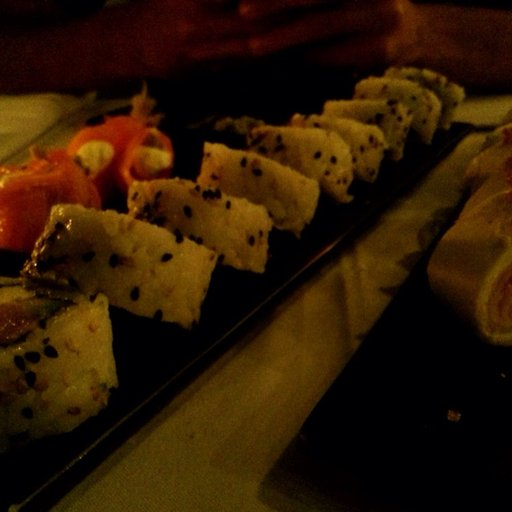

In [210]:
import random
from PIL import Image

#Set seed
#random.seed(42)
# Get the all images paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
# image_path_list
# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get Imnage class from path name
image_class = random_image_path.parent.stem
print(image_path)

# 4. Open Image
img = Image.open(random_image_path)

#5. Print Matadata
print(f"Random Image path:{random_image_path}")
print(f"Image Class:{image_class}")
print(f"Image height:{img.height}")
print(f"image width:{img.width }")
img

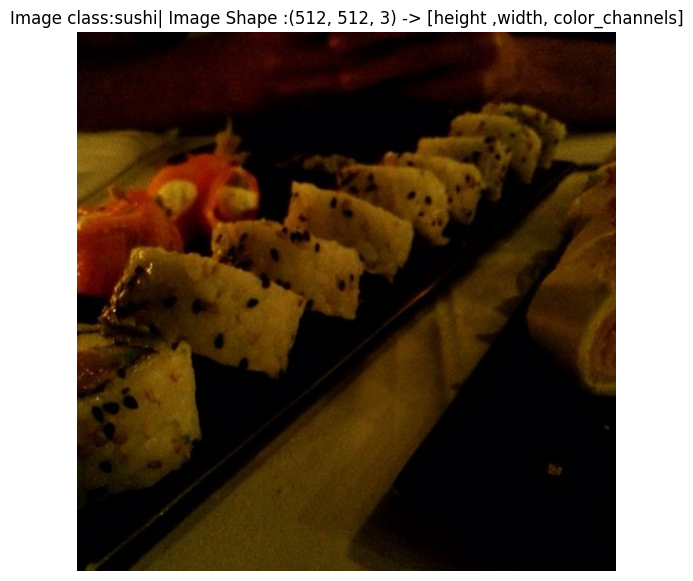

In [211]:
## Try to visuliaze a random image  with matplotlib

import numpy as np
import matplotlib.pyplot as plt
# Turn the image into an array

img_as_array = np.asarray(img)
# plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class:{image_class}| Image Shape :{img_as_array.shape} -> [height ,width, color_channels]")
plt.axis(False);




array([[[14,  0,  0],
        [14,  0,  0],
        [15,  1,  0],
        ...,
        [ 1,  1,  3],
        [ 1,  0,  5],
        [ 1,  0,  5]],

       [[14,  0,  0],
        [14,  0,  0],
        [15,  1,  0],
        ...,
        [ 1,  1,  3],
        [ 1,  0,  5],
        [ 1,  0,  5]],

       [[14,  0,  0],
        [14,  0,  0],
        [15,  1,  0],
        ...,
        [ 1,  0,  5],
        [ 1,  0,  5],
        [ 1,  0,  5]],

       ...,

       [[ 0,  1,  0],
        [ 0,  1,  0],
        [ 0,  0,  4],
        ...,
        [ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2]],

       [[ 0,  2,  0],
        [ 0,  1,  0],
        [ 0,  0,  4],
        ...,
        [ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2]],

       [[ 0,  3,  0],
        [ 0,  1,  0],
        [ 0,  0,  4],
        ...,
        [ 0,  0,  2],
        [ 0,  0,  2],
        [ 0,  0,  2]]], dtype=uint8)
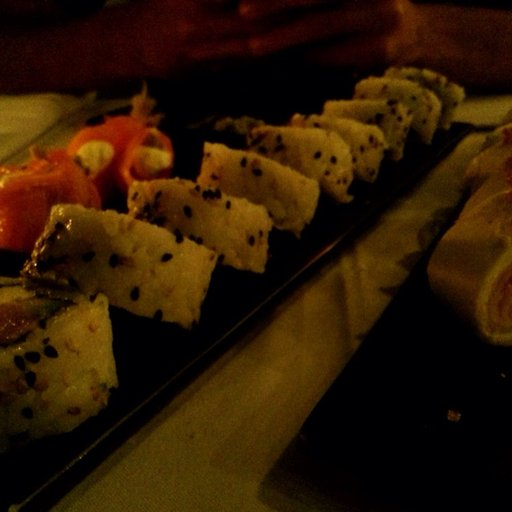

In [212]:
img_as_array

## 3. Transforming image into data
Before we can use our image data with Pytorch

1. Turn your target into tensors (in  our case, numerical representation of our image into data)
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.Dataloader`

In [213]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transforming data with `torchvision.transforms`

In [214]:
# write a transform for image
data_transform = transforms.Compose([
    #Resize our images to 64x64
    transforms.Resize(size=(64,64)),
    #Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    #Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [215]:
data_transform(img)

tensor([[[0.0549, 0.0627, 0.0706,  ..., 0.0196, 0.0118, 0.0118],
         [0.0314, 0.0392, 0.0431,  ..., 0.1373, 0.1255, 0.1098],
         [0.0157, 0.0157, 0.0157,  ..., 0.1725, 0.1765, 0.1725],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0039, 0.0157, 0.0353,  ..., 0.0000, 0.0000, 0.0000],
         [0.0157, 0.1294, 0.0902,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0000, 0.0000],
         [0.0039, 0.0039, 0.0039,  ..., 0.0353, 0.0314, 0.0314],
         [0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0510, 0.0588],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0118, 0.0235,  ..., 0.0000, 0.0000, 0.0000],
         [0.0118, 0.1137, 0.0745,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0039, 0.0039,  ..., 0.0078, 0.0039, 0.0118],
         [0.0039, 0.0039, 0.0039,  ..., 0.0118, 0.0078, 0.0118],
         [0.0039, 0.0039, 0.0000,  ..., 0.0078, 0.0078, 0.

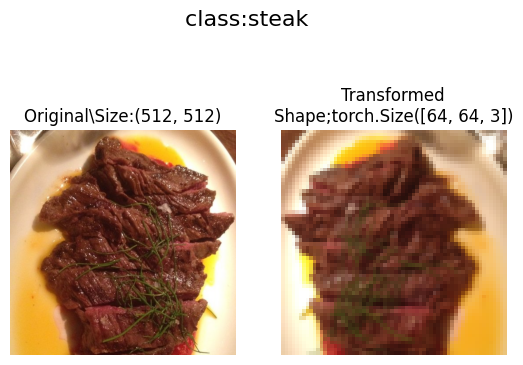

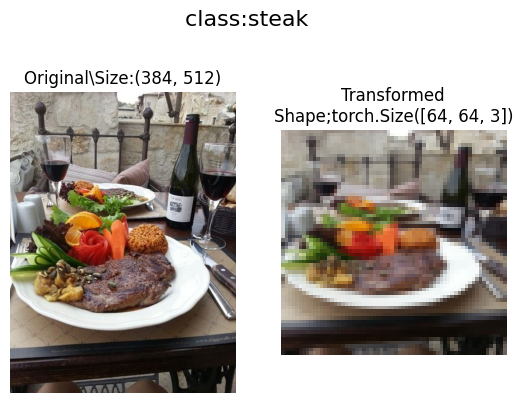

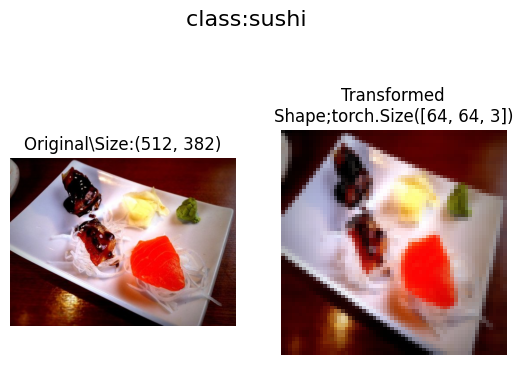

In [216]:
def plot_transformed_images(image_paths, transform, n=3,seed=42):
  """ Selects random images from a path of images and loads /transforms
  them then plots the original vs the transformed version"""
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax=plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\Size:{f.size}")
      ax[0].axis(False)

      # Transforms and plot target image
      transformed_image = transform(f).permute(1,2,0) # note we will need to change shape for
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape;{transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"class:{image_path.parent.stem} " ,fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)



In [217]:
image_path_list

[PosixPath('data/pizza_steak_sushi/train/steak/1257104.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1413972.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2017387.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/830007.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2013535.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3577618.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3142674.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2629750.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/256592.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1615395.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2878151.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/339891.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3518960.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2287136.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2254705.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1839481.jpg'),
 PosixPath(

## 4. Option 1: Loding a image a data using `ImageFolder`

we can load image data using `torchvision.datasets.ImageFolder`

In [218]:
## Use ImageFoldr to create datasets
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform= data_transform,# Transform for the data
                                  target_transform= None) # a transform into flabels
test_data = datasets.ImageFolder(root=test_dir,
                                 transform = data_transform)
train_data ,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [219]:
train_dir , test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [220]:
##Gte classses naems as list\
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [221]:
# Get class names as dict()
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [222]:
len(train_data) , len(test_data)

(225, 75)

In [223]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [224]:
## Index on the train_data dataset to get a single image and label
img,label = train_data[0][0], train_data[0][1]
img

tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0157, 0.0157, 0.

In [225]:
label

0

In [226]:
class_names[label]

'pizza'

Original Shape:torch.Size([3, 64, 64]) -->[color_channels , height, width]
Image permute:torch.Size([64, 64, 3]) -->[height, width, color_channels]


Text(0.5, 1.0, 'pizza')

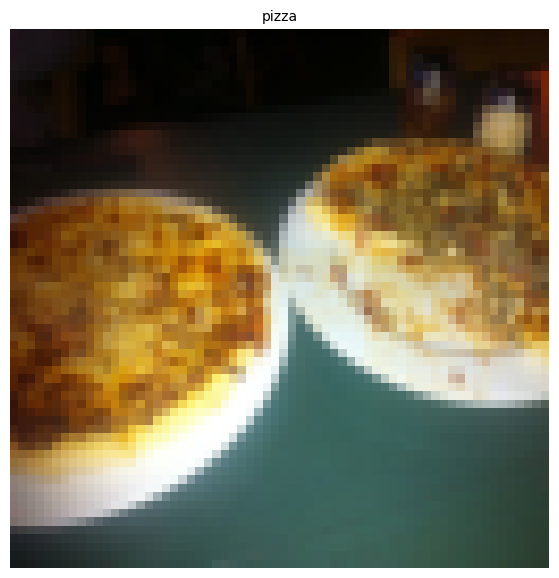

In [227]:
## Rearrange the order dimensions
img_permute = img.permute(1,2,0)

# print out different shapes
print(f"Original Shape:{img.shape} -->[color_channels , height, width]")
print(f"Image permute:{img_permute.shape} -->[height, width, color_channels]")

## plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label] , fontsize=10)

## 4.1  Turn loaded images into`dataLoaded`

a `DataLoader` is going to going to help us turn our `Dataset`'s into iterbles and we can customise the `batch_size` to our model can see `batch_size`
images at a time.

In [228]:
!nvidia-smi

Wed May  7 18:12:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             32W /   70W |    1572MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [229]:
## Turn train data and test into DataLoader
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader = DataLoader(dataset = train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a62a4115e90>,
 <torch.utils.data.dataloader.DataLoader at 0x7a62a4d5ab90>)

In [230]:
len(train_dataloader) , len(test_dataloader)

(8, 3)

In [231]:
len(train_data ),len(test_data)

(225, 75)

In [232]:
img ,label = next(iter(train_dataloader))

# Bathc size will now be 1, you can change the batch size if you like
print(f"Image Shape:{img.shape}-->[batch_size , color_channles, height, width]")
print(f"Label shape:{label.shape}")

Image Shape:torch.Size([32, 3, 64, 64])-->[batch_size , color_channles, height, width]
Label shape:torch.Size([32])


## 5. Option 2: Loading Image data with a custom `Dataset`

1. Want to be able to load images from a file
2. Want to be able to get class names from the dataset
3. want ti be able to classes as dict from Dataset

In [233]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict , List


In [234]:
## Instamse of torchvision.datasets.ImageFolder()
train_data.classes , train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

We want a functoin to:
1. Get the Class names using `os.scandir()`to traverse a target dict is in std image classifcication format).
2. raise an error if the class names aren't found(if this happens , there might be something wrong with the dict structure)
3. Turn the classes names into a dict and a list return them

In [235]:
## Setup path for target dict

target_dir = train_dir
print(f"Target Dic;{target_dir}")


##  get the class names from the target directory
class_name_found = sorted([entry.name for entry in list(os.scandir(target_dir))])
class_name_found

Target Dic;data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [236]:
list(os.scandir(target_dir))

[<DirEntry 'steak'>, <DirEntry 'sushi'>, <DirEntry 'pizza'>]

In [237]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.

    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))

    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

    # 3. Create a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [238]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`

To create our own custom dataset , we want to:

1. Subclass `torchb.utils.data.Dataset`
2. Init  our subclass with a target directory(the Directory we'd like to get from , as well sa a transform if we'd like to transform our data)
3. Create several attributes:
* paths  - paths of our images
* transform - the transform we'd like to use
* classes - a list of target classes
* class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()`, this functions will open an image
5. Overwrite the `__len__` method to return the length of our dataset
6. Overwrite the `__getitem()__` method to return a given sample when passed an index

In [239]:
## Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  def __init__(self,
               targ_dir = str,
               transform=None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.classes , self.class_to_idx = find_classes(targ_dir)
    self.transform = transform

  #4. Create a function to load images
  def load_image(self, index:int)-> Image.Image:
    "Opens an image via a path and returns its"
    image_path = self.paths[index]
    return Image.open(image_path)

  # Overwrite __len()
  def __len__(self)-> int:
    "Returns the total number of samples."
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self , index:int)-> Tuple[torch.Tensor,int]:
    "Returns one samples of data , data and labels"
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    ## Transforms if neccessarry
    if self.transform:
      return self.transform(img) , class_idx #Fixed: Changed self.transfrom to self.transform
    else:
        return img, class_idx

In [240]:
## Create a transform
from torchvision import transforms
train_transforms = transforms.Compose([
                                        transforms.Resize(size=(64,64)),
                                        transforms.RandomHorizontalFlip(p=0.5),
                                        transforms.ToTensor()
])

test_transforms = transforms.Compose([
                                      transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()
                                     ])

In [241]:
## Test our ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir = test_dir,
                                     transform=test_transforms)

In [242]:
train_data_custom , test_data_custom

(<__main__.ImageFolderCustom at 0x7a62a4a66a90>,
 <__main__.ImageFolderCustom at 0x7a62c4c28d90>)

In [243]:
len(train_data) , len(train_data_custom)

(225, 225)

In [244]:
len(test_data) , len(test_data_custom)

(75, 75)

In [245]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [246]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [247]:
## Check for Equality between oroginal ImageFolder Dataset and ImageFolderCustom Dataset
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


## 5.3  Create a Function to display random images
1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the Display getting out of hand, let's cap the number of images to see at 10.
3. Set the random seed for Reproducibility.
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot
6. Loop through the random sample images and plot them with matplotlib.
7. Make sure the dimensions of our images line up with matplotlib(HWC)

In [248]:
## 1. Create a function to take in a dataset
def display_random_images(dataset:torch.utils.data.Dataset,
                          classes :List[str] = None,
                          n:int = 10,
                          display_shape:bool = True,
                          seed:int = None):
  # 2. adjust display if n is too high
  if n>10:
    n=10
    display_shape=False
    print(f"For Display, purposes, n Shouldn't be larger than 10, setting to 10 and removing")
  # 3. Set the Seed
  if seed:
    random.seed(seed)

  #4.Get the random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k=10)

  # 5. Setp Plot
  plt.figure(figsize=(16,8))

  #6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate (random_samples_idx):
    targ_image , targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    #7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1,2,0)

    # plot adjusted samples
    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("Off")
    if classes:
      title = f"Class:{classes[targ_label]}"
      if display_shape:
        title = title +f"\nshape:{targ_image_adjust.shape}"
    plt.title(title)

For Display, purposes, n Shouldn't be larger than 10, setting to 10 and removing


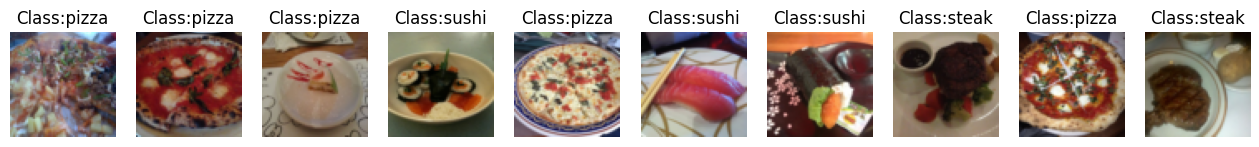

In [249]:
## Display random images from the ImageFolder created dataset
display_random_images(train_data,
                      n=20,
                      classes=class_names,
                      seed=None)

In [250]:
## 1. Create a function to take in a dataset
def display_random_images(dataset:torch.utils.data.Dataset,
                          classes :List[str] = None,
                          n:int = 10,
                          display_shape:bool = True,
                          seed:int = None):
  # 2. adjust display if n is too high
  if n>10:
    n=10
    display_shape=False
    print(f"For Display, purposes, n Shouldn't be larger than 10, setting to 10 and removing")
  # 3. Set the Seed
  if seed:
    random.seed(seed)

  #4.Get the random sample indexes
  # Fixed: Changed k=n to match the number of subplots
  random_samples_idx = random.sample(range(len(dataset)), k=n)

  # 5. Setp Plot
  plt.figure(figsize=(16,8))

  #6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate (random_samples_idx):
    targ_image , targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    #7. Adjust tensor dimensions for plotting
    targ_image_adjust = targ_image.permute(1,2,0)

    # plot adjusted samples
    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("Off")
    if classes:
      title = f"Class:{classes[targ_label]}"
      if display_shape:
        title = title +f"\nshape:{targ_image_adjust.shape}"
    plt.title(title)

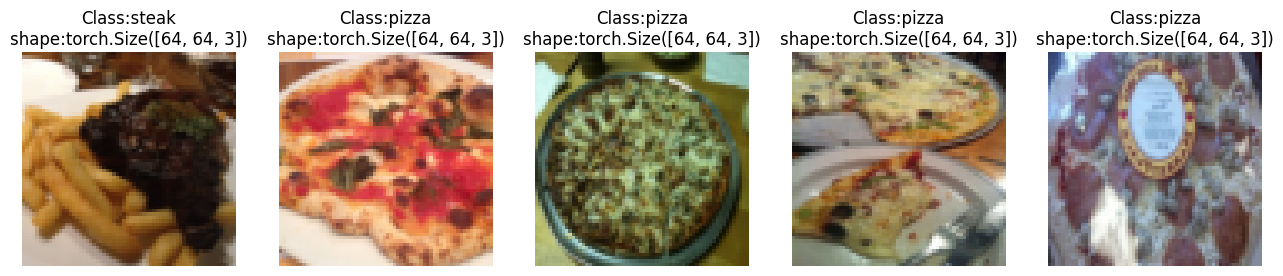

In [251]:
## Display random images from the ImageFolder created dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

For Display, purposes, n Shouldn't be larger than 10, setting to 10 and removing


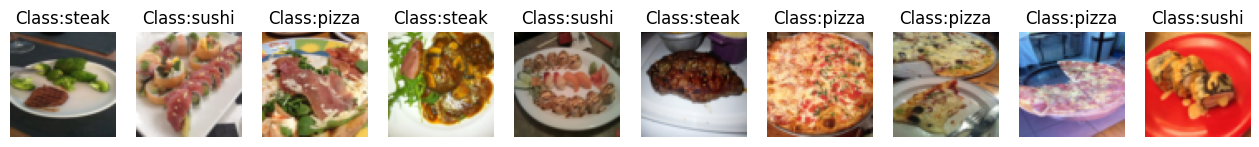

In [252]:
# Diaplay random images from the ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=20,
                      classes=class_names,
                      seed=None)

In [253]:
random.sample(range(len(train_data_custom)), k=10)

[107, 56, 114, 150, 71, 207, 222, 1, 194, 206]

## 5.4 Turn custom loaded images into `DataLoader`'s

In [254]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers = NUM_WORKERS,
                                     shuffle = True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle = False)

train_dataloader_custom  ,test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7a629d2ef490>,
 <torch.utils.data.dataloader.DataLoader at 0x7a62a5324ed0>)

In [255]:
# Get image and label from custom dataloader
img_custom , label_custom = next(iter(train_dataloader_custom))

# printout the shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6.Other Forms of transforms (data augmentation)

Data augmentation is the process of arttifially adding diversity to your training data.

In case of image data, this may mean applying various image transformations to the training images

In [256]:
 ## Let's look at the Trivial Augment
from torchvision import transforms

train_transforms=transforms.Compose([
                                        transforms.Resize(size=(224,224)),
                                        transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                        transforms.ToTensor()
 ])
test_transforms = transforms.Compose([
                                        transforms.Resize(size=(224,224)),
                                        transforms.ToTensor()
])

In [257]:
# Get the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/steak/1257104.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1413972.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2017387.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/830007.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2013535.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3577618.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3142674.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2629750.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/256592.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1615395.jpg')]

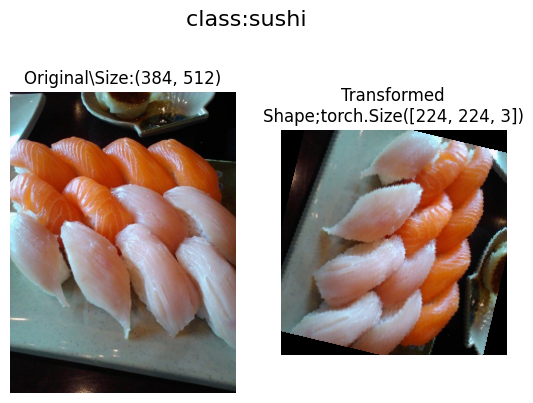

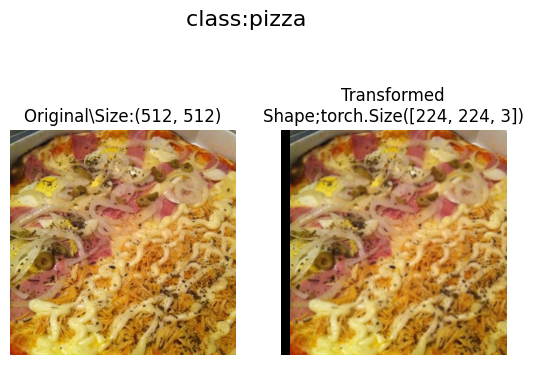

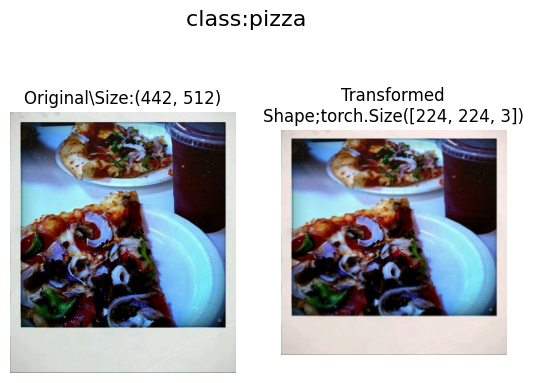

In [258]:
## Plot random transformed images
plot_transformed_images(
    image_paths = image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

## 7.Model 0 : TinyVGG without data Augmentation

## 7.1 Creating trabsforms and loading data for Model 0

In [259]:
#Create Simple transform
simple_transform = transforms.Compose([
                                        transforms.Resize(size=(64,64)),
                                        transforms.ToTensor()
])



In [260]:
##1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)
# 2. Turn the datasets into DataLoaders
import os
from torch.utils.data import DataLoader

#Setup batch size and np of works
BATCH_SIZE=32
NUM_WORKERS = os.cpu_count()

#Create Dataloaders
train_dataloaders_simple = DataLoader(dataset=train_data_simple,
                                      batch_size=BATCH_SIZE,
                                      shuffle=True,
                                      num_workers=NUM_WORKERS)
test_dataloaders_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=False,
                                     num_workers=NUM_WORKERS)


### 7.2 Create TinyVGG model class

In [261]:
class TinyVGG(nn.Module):
  """ Model architecture copying TinyVGG from CNN Explainer"""
  def __init__(self, input_shape:int,
               hidden_units:int,
               output_shape:int)->None:
    # Fixed: Changed self().__init__() to super().__init__()
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0 ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2 )# Default stride value is same as kernel_size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2 )# Default stride value is same as kernel_size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        # Fixed: Changed in_features to match the output of conv_block_2
        nn.Linear(in_features=hidden_units*13*13, # calculate the correct flattened size
                  out_features=output_shape)
    )
  def forward(self,x):
    x=self.conv_block_1(x)
    print(x.shape) # Remove or comment to reduce the output
    x=self.conv_block_2(x)
    print(x.shape) # Remove or comment to reduce the output
    x=self.classifier(x)
    return x
    #return self.classifier(self.conv_block_2(self.conv_block_1(x))) #Remove this line, because we only need single return

In [262]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [263]:
torch.manual_seed(42)
model_0=TinyVGG(input_shape=3,
                hidden_units=10,
                output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### 7.3 Try a forward passs on a single image(to test the model)

In [264]:
## Get the single image batch
image_batch , label_batch = next(iter(train_dataloaders_simple))
image_batch.shape , label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [265]:
# Try a Forward Pass
model_0(image_batch.to(device))

torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])


tensor([[0.0578, 0.0634, 0.0351],
        [0.0657, 0.0650, 0.0398],
        [0.0702, 0.0678, 0.0412],
        [0.0687, 0.0646, 0.0417],
        [0.0625, 0.0613, 0.0355],
        [0.0587, 0.0595, 0.0358],
        [0.0634, 0.0637, 0.0376],
        [0.0653, 0.0615, 0.0376],
        [0.0678, 0.0621, 0.0349],
        [0.0620, 0.0599, 0.0371],
        [0.0607, 0.0628, 0.0387],
        [0.0638, 0.0589, 0.0352],
        [0.0658, 0.0611, 0.0369],
        [0.0703, 0.0689, 0.0330],
        [0.0557, 0.0571, 0.0356],
        [0.0632, 0.0642, 0.0388],
        [0.0639, 0.0616, 0.0375],
        [0.0605, 0.0600, 0.0374],
        [0.0623, 0.0627, 0.0368],
        [0.0740, 0.0676, 0.0400],
        [0.0621, 0.0613, 0.0361],
        [0.0632, 0.0599, 0.0366],
        [0.0662, 0.0627, 0.0334],
        [0.0637, 0.0622, 0.0394],
        [0.0670, 0.0666, 0.0363],
        [0.0650, 0.0601, 0.0405],
        [0.0639, 0.0597, 0.0395],
        [0.0733, 0.0687, 0.0412],
        [0.0697, 0.0631, 0.0402],
        [0.062

### 7.4 Use `torchinfo` to get an idea of the shapes going through our model


In [266]:
## Install torchinfo , import if it's available
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0 , input_size=[1,3,64,64])


torch.Size([1, 10, 32, 32])
torch.Size([1, 10, 16, 16])
torch.Size([1, 3])


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## 7.5 Create train and test loops functions

* `train_step()` - takes in a model and dataloader and trains the model on the dataloader
* `test_step` - takes in a model and dataloader and evaluates the model on the dataloader

In [267]:
# create train-step()
def train_step(model: torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  # put the model in train mode
  model.train()

  # Setup train loss and train data batchs
  for batch,(x,y) in enumerate(dataloader):
    x,y = x.to(device) , y.to(device)

    #1.F.P
    y_pred = model(x)
    #2.Calculate the loss
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()
    #3. OPtimizer zero grad
    optimizer.zero_grad()
    #4.Loss backward
    loss.backward()
    #5.Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)
  #Adjust metrics to get average to get loss and accuracy per batch
  train_loss = train_loss/len(dataloader)
  train_acc= train_acc/len(dataloader)
  return train_loss, train_acc

In [268]:
def train_step(model: torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  # put the model in train mode
  model.train()

  train_loss, train_acc = 0, 0 # Initialize train_loss and train_acc

  # Setup train loss and train data batchs
  for batch,(x,y) in enumerate(dataloader):
    x,y = x.to(device) , y.to(device)

    #1.F.P
    y_pred = model(x)
    #2.Calculate the loss
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()
    #3. OPtimizer zero grad
    optimizer.zero_grad()
    #4.Loss backward
    loss.backward()
    #5.Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)
  #Adjust metrics to get average to get loss and accuracy per batch
  train_loss = train_loss/len(dataloader)
  train_acc= train_acc/len(dataloader)
  return train_loss, train_acc

In [269]:
#Create a test Step
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device=device):
  #put the model in eval mode
  model.eval()

  #Setup test loss and test accuracy values
  test_loss , test_acc = 0,0
  # turn on inference model
  with torch.inference_mode():
    for batch,(x,y) in enumerate(dataloader):
      #send the data to the target device
      x,y = x.to(device),y.to(device)

      # 1.Forward Pass
      test_pred_logits=model(x)
      #2. Calculate the loss
      loss=loss_fn(test_pred_logits,y)
      test_loss += loss.item()
      # calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels ==y).sum().item()/len(test_pred_labels))
  # adjust metrics
  test_loss  = test_loss/len(dataloader)
  test_acc  = test_acc / len(dataloader)
  return test_loss , test_acc




In [270]:
from tqdm.auto import tqdm


# Create a train Function that takes in various models
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
          epochs:int=5,
          device=device):

  #2.Create empty results dict()
  results={"train_loss":[],
           "train_acc":[],
            "test_loss":[],
           "test_acc":[]}

  #3. Loop through training and testing steps for no of ephocs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc=train_step(model=model,
                                     dataloader=train_dataloader,
                                     loss_fn=loss_fn,
                                     optimizer=optimizer,
                                     device=device)
    test_loss,test_acc=test_step(model=model,
                                 dataloader=test_dataloader,
                                 loss_fn=loss_fn,
                                 device=device)
  #4.Printing
  print(f"Epoch:{epoch} |Train loss {train_loss:.4f} | Train acc:{train_acc:.4f} | test loss:{test_loss:.4f} | test acc:{test_acc:.4f}")

  #5. Update results
  results["train_loss"].append(train_loss)
  results["train_acc"].append(train_acc)
  results["test_loss"].append(test_loss)
  results["test_acc"].append(test_acc)

#6.Returning all back!
  return results

# 7.7 Train and evaluate model 0


In [271]:
#Set random Seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set no of epochs
NUM_EPOCHS = 5

#Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,# no of color channels
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# setup loss functions and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)
# Start the Timer
from timeit import default_timer as timer
start_time=timer()

#Train Model_0
model_0_results=train(model=model_0,
                      train_dataloader=train_dataloaders_simple,
                      test_dataloader=test_dataloaders_simple,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)

# End the timer
end_time=timer()
print(f"Total Training Time:{end_time-start_time:.3f} seconnds")

  0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([1, 10, 32, 32])
torch.Size([1, 10, 16, 16])
torch.Size([1, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([11, 10, 32, 32])
torch.Size([11, 10, 16, 16])
torch.Size([11, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Siz

## 7.8 Plot the loss curves of Model 0

A **Loss Curve** is a way of tracking your model's progress over time!

In [272]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloaders_simple,
                        test_dataloader=test_dataloaders_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([1, 10, 32, 32])
torch.Size([1, 10, 16, 16])
torch.Size([1, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([11, 10, 32, 32])
torch.Size([11, 10, 16, 16])
torch.Size([11, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Siz

In [273]:
# Get the model_0 results keys!
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [274]:
def plot_loss_curves(results:Dict[str,List[float]]):
  """plots training curves of a results dict"""
  # get the loss values of the results dict(train and test)
  loss=results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the resluts of the dict
  accuracy = results["train_loss"]
  test_accuracy = results["test_acc"]

  #Figure out how how many epochs there were
  epochs = range(len(results["train_loss"]))

  # setup  a plot
  plt.figure(figsize=(15,7))

  # plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label="train_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # plot the accuarcy
  plt.subplot(1,2,2)
  plt.plot(epochs , accuracy , label="train_accuracy")
  plt.plot(epochs, test_accuracy , label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();





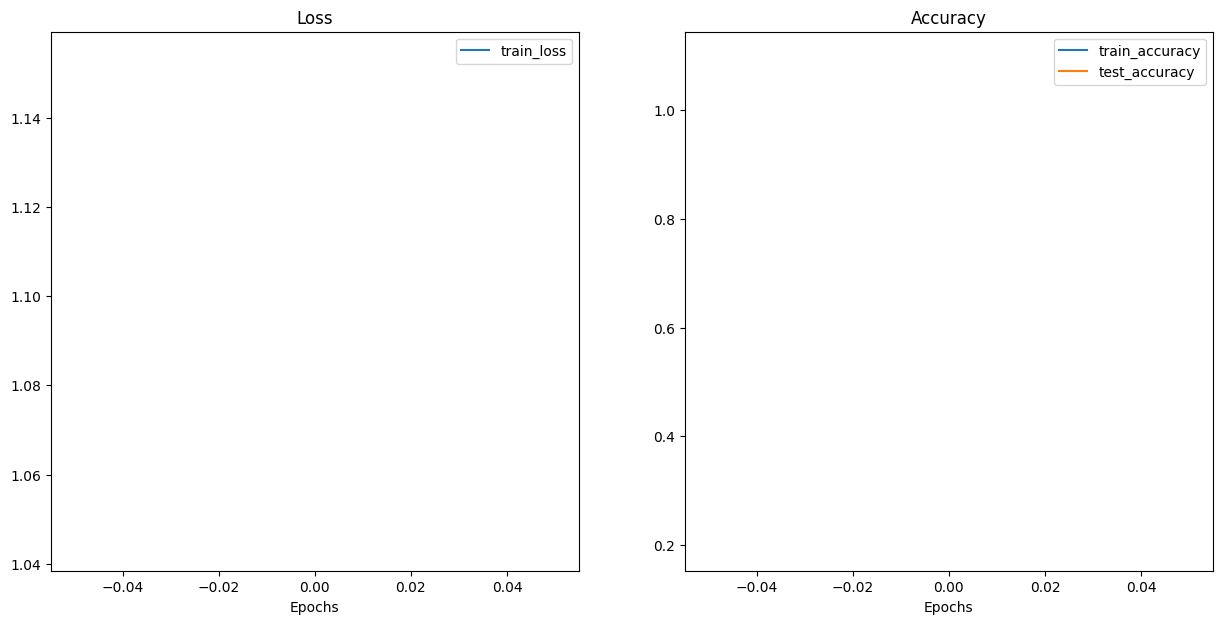

In [275]:
plot_loss_curves(model_0_results)

In [276]:
from typing import Dict, List
import matplotlib.pyplot as plt

def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training and test loss and accuracy curves."""
    # Get the loss values
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    # Get the accuracy values
    accuracy = results["train_acc"]     # <-- FIXED
    test_accuracy = results["test_acc"]

    # Figure out how many epochs there were
    epochs = range(len(loss))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot the loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # Plot the accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()  # ← Make sure to include this line!


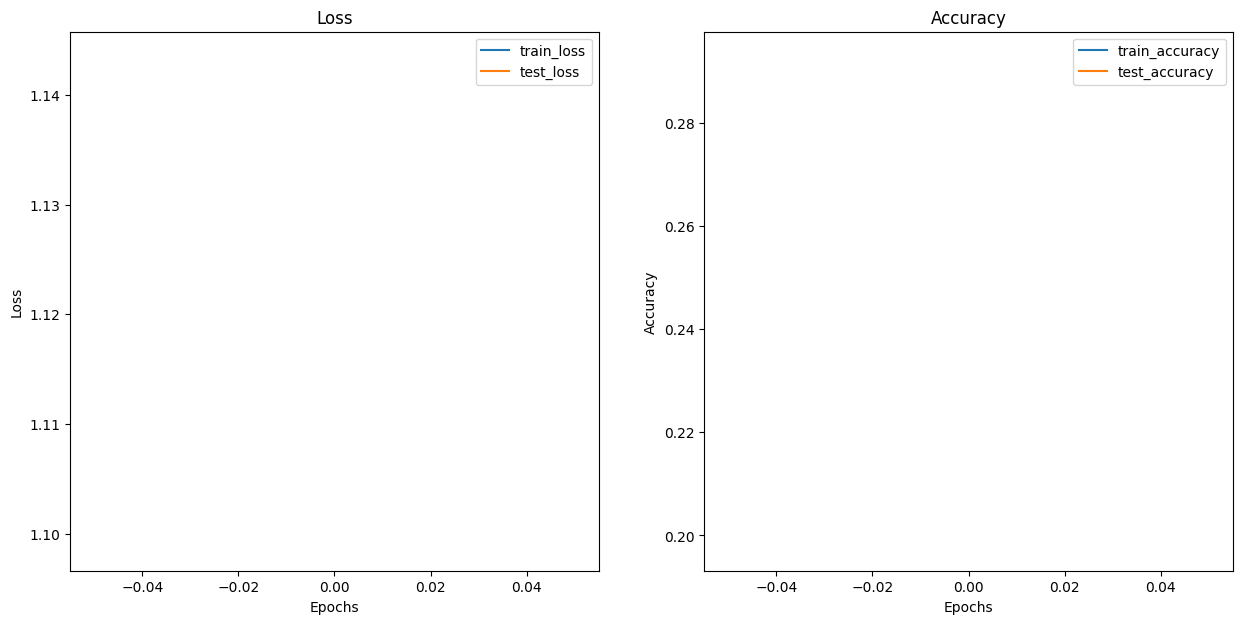

In [277]:
plot_loss_curves(model_0_results)

### 8.What should an ideal loss curve looks like?

A loss curve is one the most helpful ways to troubleshoota model

### 9. Model 1: TinyVGG with Data Augmentation

Now let's try another modelling experiment this time using the same model as before with some data augmentation

In [278]:
### 9.1 # create training transform with TrivialAugment!
from torchvision import transforms
train_transform_trivial = transforms.Compose([
                                              transforms.Resize(size=(64,64)),
                                              transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                              transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
                                              transforms.Resize(size=(64,64)),
                                              transforms.ToTensor()
])



### 9.2 Create train and test `datasets` and `DataLoaders` with data augmentation

In [279]:
## Turn image folders into datasets
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform = test_transform_simple)


In [280]:
# Turn our Datasets into Dataloaders

import os
BATCH_SIZE = 32
NUM_WORRKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)


### 9.3 Construct and train model 1
This time we'll be using the same model architecture except this time we've augmented the training data

In [281]:
#Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### Wonderful! Now we've a model and dataloaders , let's create a loss function and an optimizers and call upon our `train` evalaute the model.


In [282]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the no of epochs
NUM_EPOCHS = 5

#Setup loss function!
loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)
#start the timer
from timeit import default_timer as timer
start_time = timer()

#Train a model 1
model_1_results = train(model=model_1,
                        train_dataloader = train_dataloader_augmented,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn=loss_fn,
                        epochs =NUM_EPOCHS,
                        device=device)

#End the timer and print out how long it took
end_time = timer()
print(f"total training time for model_1:{end_time-start_time:.3f}seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([1, 10, 32, 32])
torch.Size([1, 10, 16, 16])
torch.Size([1, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([11, 10, 32, 32])
torch.Size([11, 10, 16, 16])
torch.Size([11, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 3])
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Siz

In [283]:
!nvidia-smi

Wed May  7 18:12:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   78C    P0             32W /   70W |    1572MiB /  15360MiB |      2%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [284]:
model_1_results

{'train_loss': [1.089976742863655],
 'train_acc': [0.42578125],
 'test_loss': [1.1483396689097087],
 'test_acc': [0.2604166666666667]}

## 9.4 Plot the loss curves of model 1
A loss curve helps you evaluate your models performance overtime!

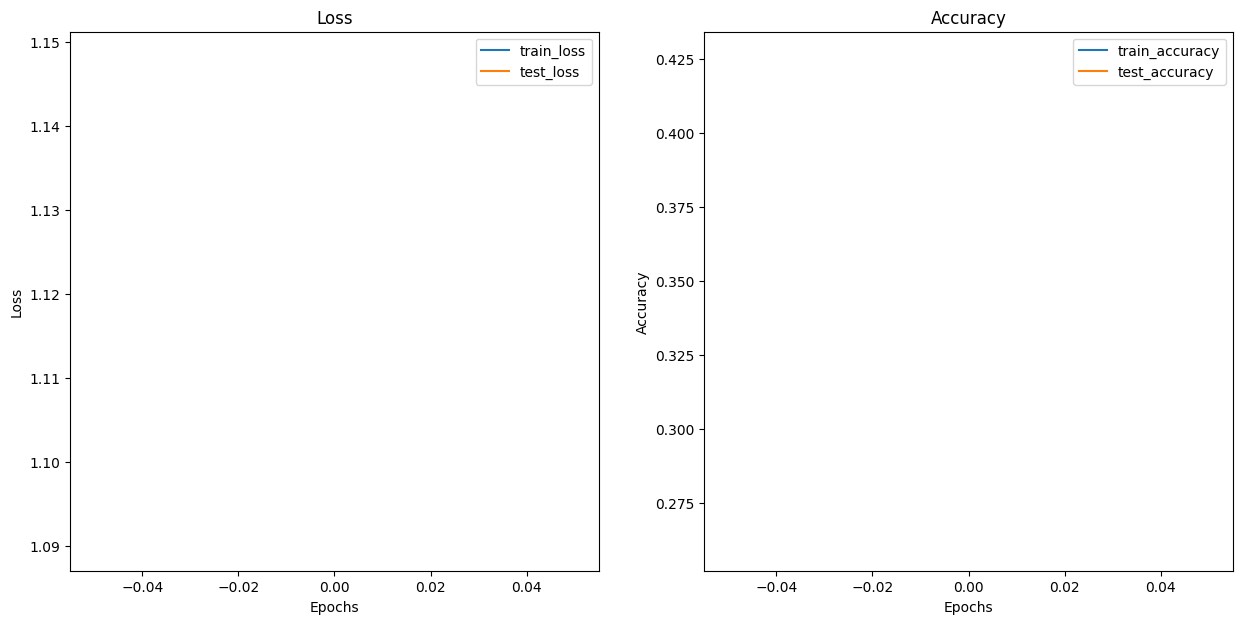

In [285]:
plot_loss_curves(model_1_results)

## 10. Compare model results
after evaluating our modelling experiments on their own, it's important to compare them to each other.

There's a few different  ways to do this:
1. Hard coding(what we're doing)
2. Pytorch+Tensorboard----> `wandb.ai`
3. Weights and bias------->`mlflow.org`

In [286]:
import pandas as pd
model_0_df=pd.DataFrame(model_0_results)
model_1_df=pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.098871,0.292969,1.143508,0.197917


In [287]:
model_1_df

,train_loss,train_acc,test_loss,test_acc
0,1.089977,0.425781,1.14834,0.260417


### 11. Making a prediction on a custom image

Although we've trained a model on custom data... how do you make a prediction on a sample/image that's not in either training or testing dataset

In [288]:
## Downloading custom image
import requests

#Setup custom image path
custom_image_path = data_path /"04-pizza-dad.jpeg"

# Downloading the image if it doesn't already exist
if not custom_image_path.is_file():
  with open(custom_image_path,"wb") as f:
    #when dowmloadng from github, you need to use "raw" file link
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
    print(f"downloading{custom_image_path}.......")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists,skipping downloading's.......")

data/04-pizza-dad.jpeg already exists,skipping downloading's.......


### 11.1 Loading in a custom image with Pytorch
we have to make sure out custom image is in the same format as the data our model was tranind on.
* in tensor form with datatype(torch.float32)
* of shape 64x64x3
* On the right Device

In [289]:
import torchvision

#Read in custom image
custom_image_uint8 = torchvision.io.read_image(custom_image_path)
print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image shape:{custom_image_uint8.shape}")
print(f"Custom image datatype:{custom_image_uint8.dtype}")
#custom_image_uint8

Custom image tensor:
 tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape:torch.Size([3, 4032, 3024])
Custom image datat

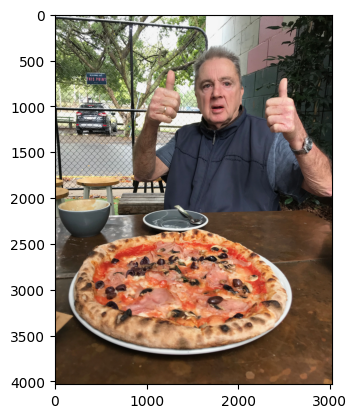

In [290]:
plt.imshow(custom_image_uint8.permute(1,2,0))

### 11.2 Making a prediction on a custom image with a trained Pytorch model

In [291]:
custom_image=torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [293]:
#create transform pipline to resize image
from torchvision import transforms
custom_image_transform = transforms.Compose([transforms.Resize(size=(64,64))])

#Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out the shapes
print(f"Original shape:{custom_image.shape}")
print(f"Transformed Shape:{custom_image_transformed.shape}")

Original shape:torch.Size([3, 4032, 3024])
Transformed Shape:torch.Size([3, 64, 64])


In [294]:
# try to make on a custom image with a trained pytorch model

model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred

torch.Size([1, 10, 32, 32])
torch.Size([1, 10, 16, 16])
torch.Size([1, 3])


tensor([[ 0.1188,  0.0341, -0.1492]], device='cuda:0')

Note, to make a prediction on a custom image we had to:
* Load the image was the same datatype as the model (torch.float32)
* Make sure the image was the same shape as the data model was trained on(3,64,64) with a batch size(1,3,64,64)
* make sure the image was on the same device as our model

In [295]:
#Convert logits --> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred,dim=1)
custom_image_pred_probs

tensor([[0.3726, 0.3423, 0.2850]], device='cuda:0')

In [296]:
# Convert prediction probabilities  --> prediction labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_labels

tensor([0], device='cuda:0')

In [297]:
class_names[custom_image_pred_labels]

'pizza'

### 11.3 Putting Custom image prediction together: building a function
Ideal outcome
A function where we pass an image path to and have our model predict on that image and plot the image +prediction

In [298]:
def pred_and_plot_image(model :torch.nn.Module,
                        image_path:str,
                        class_names:List[str]=None,
                        transform=None,
                        device=device):
  """make a prediction on a target image with a trained model and plots the image and prediction"""
  #Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
  #divide the image pixel values by 255 to get them b/w [0,1]
  target_image=target_image/255.
  # Transform if necessary
  if transform:
    target_image = transform(target_image)

    #Turn on eval/inference mode and make a prediction
    model.eval()
    with torch.inference_mode():
      #add an extra dimension to the image(this is the batch dimension, e.g our model will predict on batchs pf 1x image)
      target_image = target_image.unsqueeze(0)

      #Make a prediction on the image with an extra dimension
      target_image_pred = model(target_image.to(device))

    # convert logits --> prediction probabilities
    target_image_pred_probs = torch.softmax(target_image_pred , dim=1)

    #Convert prediction probablities --> prediction labels
    target_image_pred_labels = torch.argmax(target_image_pred_probs , dim=1)

    # Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1,2,0)) # remove batch dim and rearrange shape
    if class_names:
      title=f"pred:{class_names[target_image_pred_labels.cpu()]} | Prob :{target_image_pred_probs.max().cpu():.3f}"
    else:
      title=f"Pred:{target_image_pred_labels} | prob:{target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)







torch.Size([1, 10, 32, 32])
torch.Size([1, 10, 16, 16])
torch.Size([1, 3])


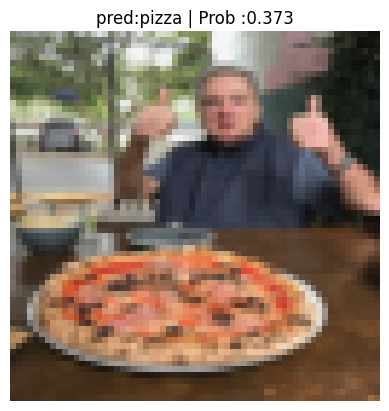

In [299]:
#pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)

**Thank you !**